# Data Cleanning

### 1-handling missing values
#### 2-standardizing data Fromat
#### 3-Filter Unwanted outliers
#### 4-Handing Duplicates 
#### 5-Column name
#### 7-split id needed
#### 8-Check primary key not have duplicate
#### 9-Check datatypes
#### 9-Other many types of cleanning

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r"C:\Users\ashu9\Downloads\retail_sales_dirty.csv")

In [157]:
df.head(5)

,OrderID,CustomerName,Date,Product,Quantity,Price,Total,City,State,Country,Payment
0,1,christine moses,09-03-2025,Headphones,5,500.0,2500.0,South Michael,South Carolina,China,UPI
1,2,Clinton Wood,19-08-2025,Laptop,Two,50.0,NaN,Zamorafort,North Carolina,Canada,Debit
2,3,James Obrien,19.04.25,Laptop,Two,800.0,NaN,Jenkinsbury,Washington,China,NaN
3,4,Corey Wolfe,31-12-2024,tablet,5,100.0,500.0,BREWERFORT,Colorado,UK,Cash
4,5,John Atkinson,26.03.25,Camera,1,400.0,400.0,North Jerrychester,New Mexico,India,Debit


In [158]:
# Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       5000 non-null   int64  
 1   CustomerName  5000 non-null   object 
 2   Date          5000 non-null   object 
 3   Product       5000 non-null   object 
 4   Quantity      4238 non-null   object 
 5   Price         4999 non-null   float64
 6   Total         3177 non-null   float64
 7   City          5000 non-null   object 
 8   State         5000 non-null   object 
 9   Country       5000 non-null   object 
 10  Payment       4004 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 429.8+ KB


#### check the missing column values

In [159]:
df.isnull().sum()

OrderID            0
CustomerName       0
Date               0
Product            0
Quantity         762
Price              1
Total           1823
City               0
State              0
Country            0
Payment          996
dtype: int64

<Axes: >

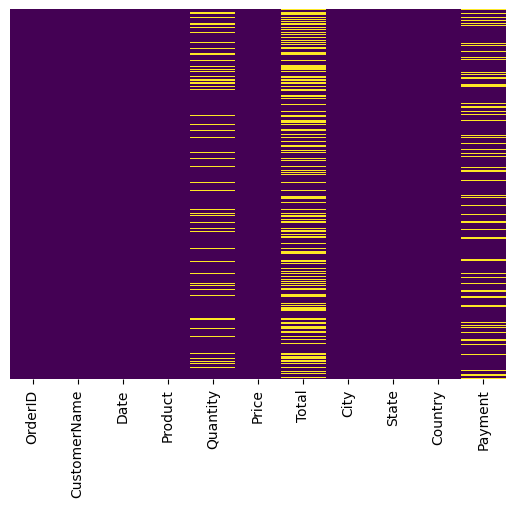

In [160]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

#### Check Duplicate Rows

In [161]:
df.duplicated().sum()

np.int64(0)

#### Check the data quality of column-1 OrderID

In [162]:
# check duplicates
df["OrderID"].duplicated().sum()

# check datatype
df["OrderID"].dtypes

dtype('int64')

#### Check 2nd CustmerName Column Data Quality

In [163]:
# format the names and remove the whitespaces from he starting
df["CustomerName"]=df["CustomerName"].str.title()
df["CustomerName"]=df["CustomerName"].str.lstrip()

df.head(2)


,OrderID,CustomerName,Date,Product,Quantity,Price,Total,City,State,Country,Payment
0,1,Christine Moses,09-03-2025,Headphones,5,500.0,2500.0,South Michael,South Carolina,China,UPI
1,2,Clinton Wood,19-08-2025,Laptop,Two,50.0,NaN,Zamorafort,North Carolina,Canada,Debit


#### Check the 3rd Date column Quality

In [164]:
# convert Date in proper formatting
df['Date'] = df['Date'].str.replace('.', '-', regex=False)
df.head(2)

,OrderID,CustomerName,Date,Product,Quantity,Price,Total,City,State,Country,Payment
0,1,Christine Moses,09-03-2025,Headphones,5,500.0,2500.0,South Michael,South Carolina,China,UPI
1,2,Clinton Wood,19-08-2025,Laptop,Two,50.0,NaN,Zamorafort,North Carolina,Canada,Debit


#### Check 4th column Product 

In [165]:
# check the data type

df["Product"].dtypes

dtype('O')

In [166]:

# formatting Product column
df["Product"]=df["Product"].str.title()
df.head(5)


,OrderID,CustomerName,Date,Product,Quantity,Price,Total,City,State,Country,Payment
0,1,Christine Moses,09-03-2025,Headphones,5,500.0,2500.0,South Michael,South Carolina,China,UPI
1,2,Clinton Wood,19-08-2025,Laptop,Two,50.0,NaN,Zamorafort,North Carolina,Canada,Debit
2,3,James Obrien,19-04-25,Laptop,Two,800.0,NaN,Jenkinsbury,Washington,China,NaN
3,4,Corey Wolfe,31-12-2024,Tablet,5,100.0,500.0,BREWERFORT,Colorado,UK,Cash
4,5,John Atkinson,26-03-25,Camera,1,400.0,400.0,North Jerrychester,New Mexico,India,Debit


#### check the 5th column Quantity

In [167]:
# formatting Quantity column
df["Quantity"]=df["Quantity"].replace("Two",2)
df["Quantity"].head(3)

0    5
1    2
2    2
Name: Quantity, dtype: object

In [168]:
# check the data type
df["Quantity"].dtypes
df["Quantity"]=pd.to_numeric(df["Quantity"])
df["Quantity"].dtypes
df["Quantity"].head(3)

0    5.0
1    2.0
2    2.0
Name: Quantity, dtype: float64

#### check the 6th Price column Data quality

In [169]:
# check the data type
df["Price"]=df["Price"].fillna(0)
df['Price'] = df['Price'].astype('int64')
df["Price"].dtype

dtype('int64')

In [170]:
# handling the Quantity column missing data 
# fill 0 in the missing values

df["Quantity"]=df["Quantity"].fillna(0)

# handling Total column missing values
df["Total"]=df["Total"].fillna(df["Quantity"]*df["Price"])

# Handle missing Values in Payment method column
df["Payment"]=df["Payment"].fillna("Other")
df.isnull().sum()

OrderID         0
CustomerName    0
Date            0
Product         0
Quantity        0
Price           0
Total           0
City            0
State           0
Country         0
Payment         0
dtype: int64

#### check the 7th Total column data Quality

In [171]:
# check the data type
df["Total"].dtypes
df["Total"]=df["Total"].astype('int64')
df["Total"].dtype

dtype('int64')

#### check the 8th City column data Quality

In [172]:
# check the data type
df["City"].dtypes
df["City"]=df["City"].astype('string')
# formatting City column
df["City"]=df["City"].str.title()
df["City"]=df["City"].str.lstrip()
df.head(5)


,OrderID,CustomerName,Date,Product,Quantity,Price,Total,City,State,Country,Payment
0,1,Christine Moses,09-03-2025,Headphones,5.0,500,2500,South Michael,South Carolina,China,UPI
1,2,Clinton Wood,19-08-2025,Laptop,2.0,50,100,Zamorafort,North Carolina,Canada,Debit
2,3,James Obrien,19-04-25,Laptop,2.0,800,1600,Jenkinsbury,Washington,China,Other
3,4,Corey Wolfe,31-12-2024,Tablet,5.0,100,500,Brewerfort,Colorado,UK,Cash
4,5,John Atkinson,26-03-25,Camera,1.0,400,400,North Jerrychester,New Mexico,India,Debit


#### Check the 9th state column data quality

In [173]:
# check the data type
df["State"].dtype
df["State"]=df["State"].astype('string')

# formatting State column
df["State"]=df["State"].str.title()
df["State"]=df["State"].str.lstrip()
df.head(5)

,OrderID,CustomerName,Date,Product,Quantity,Price,Total,City,State,Country,Payment
0,1,Christine Moses,09-03-2025,Headphones,5.0,500,2500,South Michael,South Carolina,China,UPI
1,2,Clinton Wood,19-08-2025,Laptop,2.0,50,100,Zamorafort,North Carolina,Canada,Debit
2,3,James Obrien,19-04-25,Laptop,2.0,800,1600,Jenkinsbury,Washington,China,Other
3,4,Corey Wolfe,31-12-2024,Tablet,5.0,100,500,Brewerfort,Colorado,UK,Cash
4,5,John Atkinson,26-03-25,Camera,1.0,400,400,North Jerrychester,New Mexico,India,Debit


#### Check the 4th Country column data quality

In [174]:
# check the data type
df["Country"].dtype
df["Country"]=df["Country"].astype('string')

# formatting Country column
df["Country"]=df["Country"].str.title()
df["Country"]=df["Country"].str.lstrip()
df.head(5)


,OrderID,CustomerName,Date,Product,Quantity,Price,Total,City,State,Country,Payment
0,1,Christine Moses,09-03-2025,Headphones,5.0,500,2500,South Michael,South Carolina,China,UPI
1,2,Clinton Wood,19-08-2025,Laptop,2.0,50,100,Zamorafort,North Carolina,Canada,Debit
2,3,James Obrien,19-04-25,Laptop,2.0,800,1600,Jenkinsbury,Washington,China,Other
3,4,Corey Wolfe,31-12-2024,Tablet,5.0,100,500,Brewerfort,Colorado,Uk,Cash
4,5,John Atkinson,26-03-25,Camera,1.0,400,400,North Jerrychester,New Mexico,India,Debit


#### Check the 11th Payment column data quality

In [175]:
# check the data type
df["Payment"].dtype

# formatting Payment column
df["Payment"]=df["Payment"].str.title()
df["Payment"]=df["Payment"].str.lstrip()
df.head(5)


,OrderID,CustomerName,Date,Product,Quantity,Price,Total,City,State,Country,Payment
0,1,Christine Moses,09-03-2025,Headphones,5.0,500,2500,South Michael,South Carolina,China,Upi
1,2,Clinton Wood,19-08-2025,Laptop,2.0,50,100,Zamorafort,North Carolina,Canada,Debit
2,3,James Obrien,19-04-25,Laptop,2.0,800,1600,Jenkinsbury,Washington,China,Other
3,4,Corey Wolfe,31-12-2024,Tablet,5.0,100,500,Brewerfort,Colorado,Uk,Cash
4,5,John Atkinson,26-03-25,Camera,1.0,400,400,North Jerrychester,New Mexico,India,Debit
